In [1]:
import pandas as pd
import numpy as np

# import the wine dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 
                   'Ash', 'Alcalinity of ash', 'Magnesium', 
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
                   'Proanthocyanins', 'Color intensity', 'Hue', 
                   'OD280/OD315 of diluted wines', 'Proline'
                  ]
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [2]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# randomly partition the wine dataset for test & training datasets
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
# normilizing data via min-max scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norn = mms.transform(X_test)

# data standardization
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [5]:
# L1 regularization using 'l1' penalty parameter for the Wine dataset
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Trainig accuracy:', lr.score(X_train_std, y_train))

Trainig accuracy: 0.983870967742


In [6]:
print('Test accuracy:', lr.score(X_test_std, y_test))

Test accuracy: 0.981481481481


In [7]:
lr.intercept_

array([-0.38382136, -0.15813532, -0.70043083])

In [8]:
lr.coef_

array([[ 0.28022187,  0.        ,  0.        , -0.02799929,  0.        ,
         0.        ,  0.7101044 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23629633],
       [-0.64364926, -0.06894695, -0.05716616,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92722128,
         0.05974408,  0.        , -0.37104657],
       [ 0.        ,  0.061509  ,  0.        ,  0.        ,  0.        ,
         0.        , -0.63601529,  0.        ,  0.        ,  0.49807008,
        -0.35828705, -0.57129381,  0.        ]])

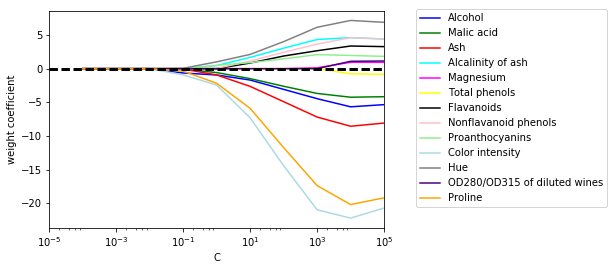

In [9]:
# plotting the regularization path
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue',
         'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()
